# Introduction  

_This exercise was adapted from the_ [_Alex's Lemonade Stand training module_](https://github.com/AlexsLemonade/training-modules/blob/master/scRNA-seq/04-scrnaseq_exercise.Rmd) _under a Creative Commons Attribution license_. 

Our objective for this exercise is to investigate the expression of marker genes across cell types.
Here we consider *marker genes* to be genes considered by the field to be classic indicators of cell type.

These *marker genes* are the ones often used for FAC sorting, which is what was done in [Darmanis et al. _Cell Reports._ 2017.](https://www.ncbi.nlm.nih.gov/pubmed/29091775). 

Here's a figure from their paper to give you a very brief overview of their 
FAC sorting methodology. 
  
<img src="../figures/glioblastoma_facs.jpg" width=500>

For more details on the methods, [see their manuscript.](https://www.ncbi.nlm.nih.gov/pubmed/29091775)
But, in short, this study splits cells from a glioblastoma tumor by their cell-type based on their FAC sorting. 

The authors identified neoplastic cells using multiple analyses, including a high level of _SOX9_ expression. The neoplastic cells make up the vast majority of the tumor core. So by seeing what marker genes they express, we may get an initial, gene-by-gene idea of how these cells behave. 

The end result of this exercise will be a heatmap to compare the mean expression of the marker genes by cell type. We will also visualize the marker gene expression in reduced dimensions by creating a principal components scatterplot that color codes each cell by the expression level of a marker gene. 

The **preprocessing exercise** includes filtering and normalizing the raw expression matrix; the **analysis exercise** starts from a pre-processed expression matrix. You can do either or both of these exercises.

# Preprocessing exercise

## Load raw expression matrix

Previously, you unzipped the `data.zip` file, which should leave you with the glioblstoma data in the data directory: `scRNA-python-workshop/content/data/glioblastoma.h5ad`. Load that file. 

In [1]:
import scanpy as sc

adata = sc.read('../data/glioblastoma_raw.h5ad')

In [2]:
adata

AnnData object with n_obs × n_vars = 1853 × 7683
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis'

## Task: quality control

Practice filtering based on quality control metrics. You can refer back to the [Quality control](https://chanzuckerberg.github.io/scRNA-python-workshop/preprocessing/01-basic-qc.html) notebook for useful code snippets.  

Your workflow should consist of:  

1. Calculate quality control metrics  
2. Plot the distribution of metrics of interest and determine reasonable thresholds. Do you think the same cutoff values (that we used for the Tabula Muris data) are appropriate for this dataset? Why or why not?  
3. Filter out cells and genes using these values. How many cells were removed? How many genes?

Compare your results to your neighbor's, and discuss why you made the choices you did. 

## Task: normalization
Practice normalizing this dataset. You can refer back to the [Normalization](https://chanzuckerberg.github.io/scRNA-python-workshop/preprocessing/02-normalization.html) notebook for useful code snippets.  

Your workflow should consist of:  
1. Using PCA to get a visual overview of the data and potential confounders (e.g., `adata.obs['plate_id']`)
1. Adjusting for library size  
2. Normalizing gene expression  
3. Using PCA to understand how normalization is effecting the data  

Compare your results to your neighbor's, and discuss why you made the choices you did. 

In [5]:
import scanpy as sc # import scanpy to handle our AnnData 
import pandas as pd # import pandas to handle dataframes
import matplotlib.pyplot as plt # import matplotlib to visualize our qc metrics

In [4]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
adata

AnnData object with n_obs × n_vars = 1853 × 7683
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

Text(0, 0.5, 'N cells')

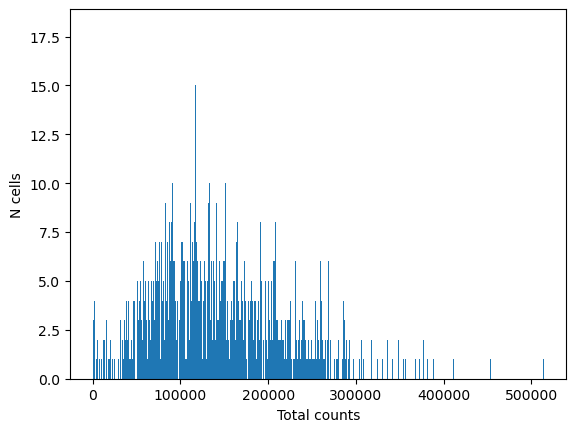

In [7]:
plt.hist(adata.obs['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')
# Reasonable threshold might be 50000 again

Text(0, 0.5, 'N cells')

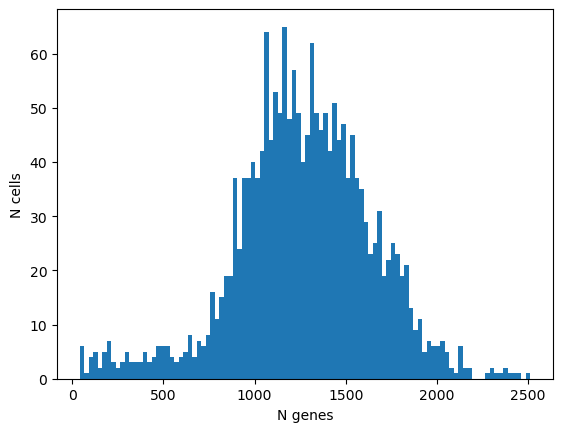

In [8]:
plt.hist(adata.obs['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
# Reasonable threshold might be 500 this time

In [9]:
sc.pp.filter_cells(adata, min_genes = 500)

In [10]:
adata

AnnData object with n_obs × n_vars = 1780 × 7683
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

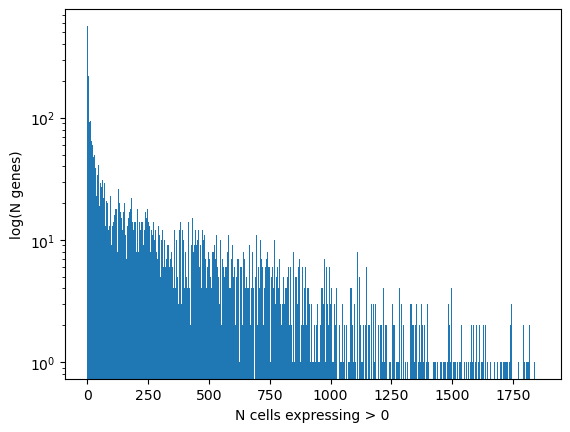

In [11]:
plt.hist(adata.var['n_cells_by_counts'], bins=1000)
plt.xlabel('N cells expressing > 0')
plt.ylabel('log(N genes)') # for visual clarity
plt.yscale('log') 

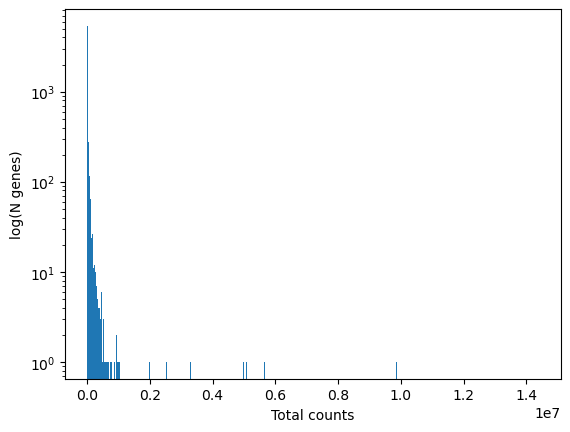

In [12]:
plt.hist(adata.var['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('log(N genes)') # for visual clarity
plt.yscale('log') 
# plt.xlim(0,5e7)
# plt.axvline(10, color='red')

In [13]:
sc.pp.filter_genes(adata, min_cells = 10)

In [14]:
adata # Removed around 2000 genes

AnnData object with n_obs × n_vars = 1780 × 5964
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

/Users/pranavpabba/opt/anaconda3/envs/sfn-workshop/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


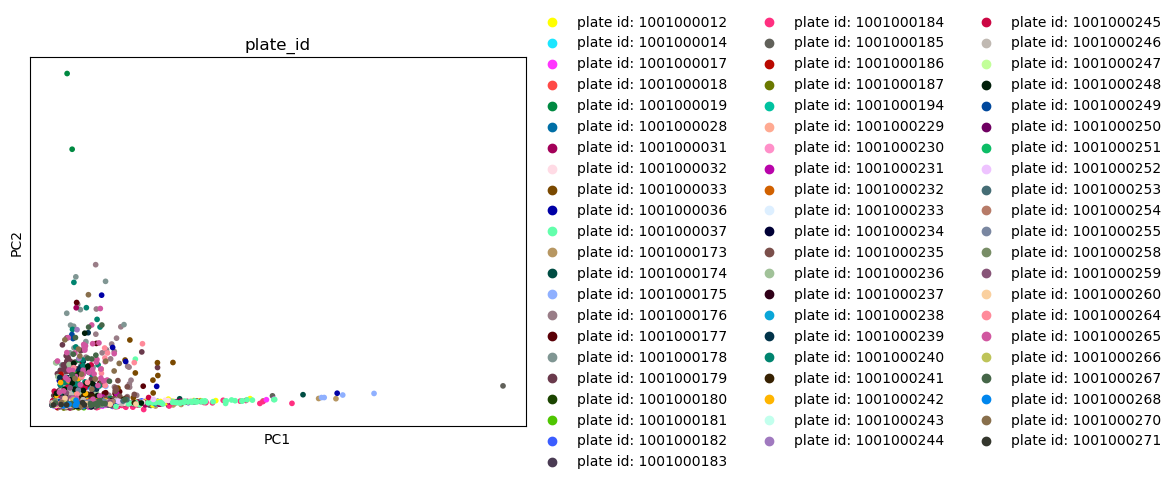

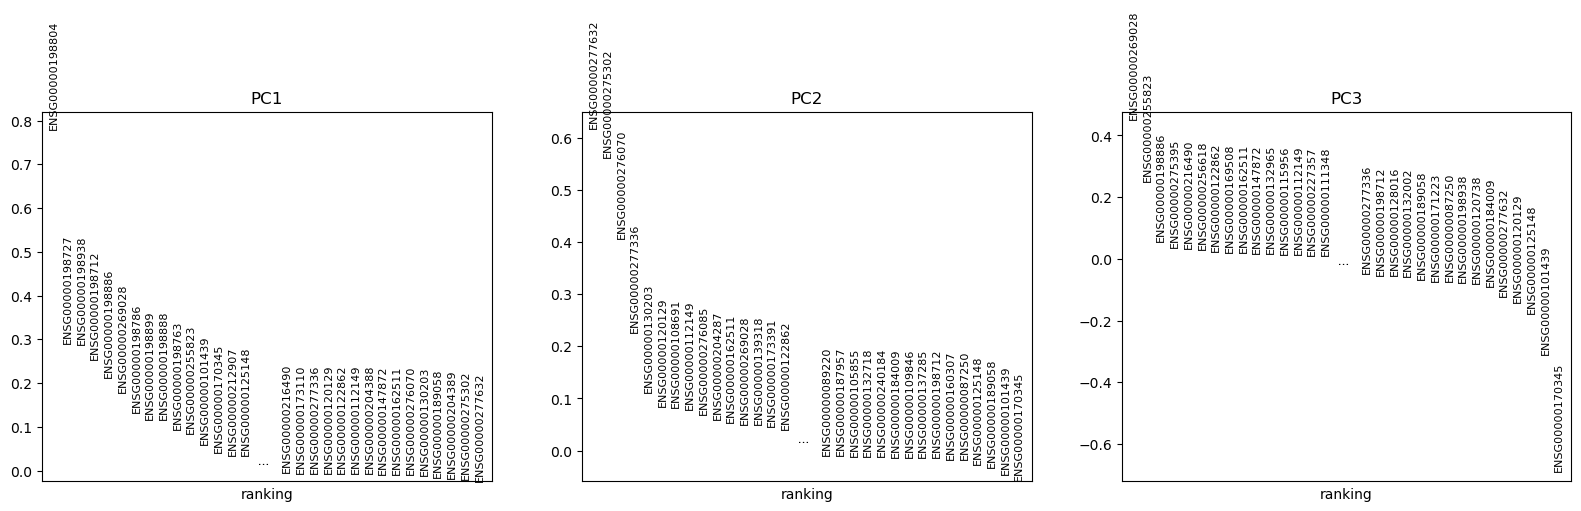

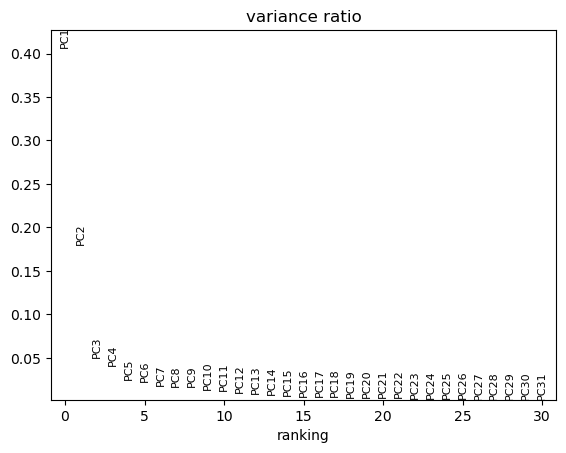

In [16]:
sc.pp.pca(adata)
sc.pl.pca_overview(adata, color='plate_id')

In [17]:
sc.pp.normalize_per_cell(adata, 
                         counts_per_cell_after=1e6)

In [18]:
sc.pp.log1p(adata)
sc.pp.scale(adata)

# Analysis exercise

## Load data

If you did not do the preprocessing exercise above, you can start from this preprocessed data.

In [2]:
adata = sc.read('../data/glioblastoma_normalized.h5ad')

## Task: extract marker genes

For this exercise, we want to analyze specific genes and their expression among 
the cell types in our dataset. We have already added _SOX9_ and _CD45_ as marker genes to investigate as 
controls, due to their use in the methods for FAC sorting. _MOG_ has been added as a different type of control: a gene that wasn't used for FACS, but is related to myelination, and thus the oligodendrocyte phenotype. 

Add other genes you are interested in to the gene list we started for you below. 
You can use  [GeneCard](https://www.genecards.org/.) to get information about 
your chosen gene. Then add your chosen gene to this data.frame in the same format we have started 
for you by replacing our `<FILL_IN_THE_BLANKS>`. 

Note: Here, you'll need to use Ensembl IDs. There are ways to convert these to other forms of gene IDs in a bulk fashion, but for this exercise, we will only need a few genes and we've already set some up for you. 

In [19]:
# Make a dictionary that contains gene symbols and their associated Ensembl IDs
markers = {'Sox9': 'ENSG00000125398',
           'Cd45': 'ENSG00000081237',
           'Mog': 'ENSG00000204655',
#            'REPLACE_GENE_SYMBOL': 'REPLACE_ENSEMBL_GENE_ID'
          }

Depending on the gene you chose, it may not be in our filtered matrix, so you 
may need to try a few. 
You can use an `in` operator to check if the gene you are looking for is in 
our filtered gene matrix (Remember it has to be an Ensembl gene ID e.g.`ENSG...`,
and it needs to be in quotes).

Use the phrase below to find out if a gene you are interested in is in the filtered dataset:  

`print('ENSG00000125398' in adata.var.index)`

## Task: investigate how the mean expression of marker genes compares across cell types

Use `sc.pl.heatmap()` to visualize how these marker genes vary across cell types.  

What do you think? Do the results make sense? 

categories: cell type: Astocyte, cell type: Immune cell, cell type: Neoplastic, etc.
var_group_labels: Sox9, Cd45, Mog


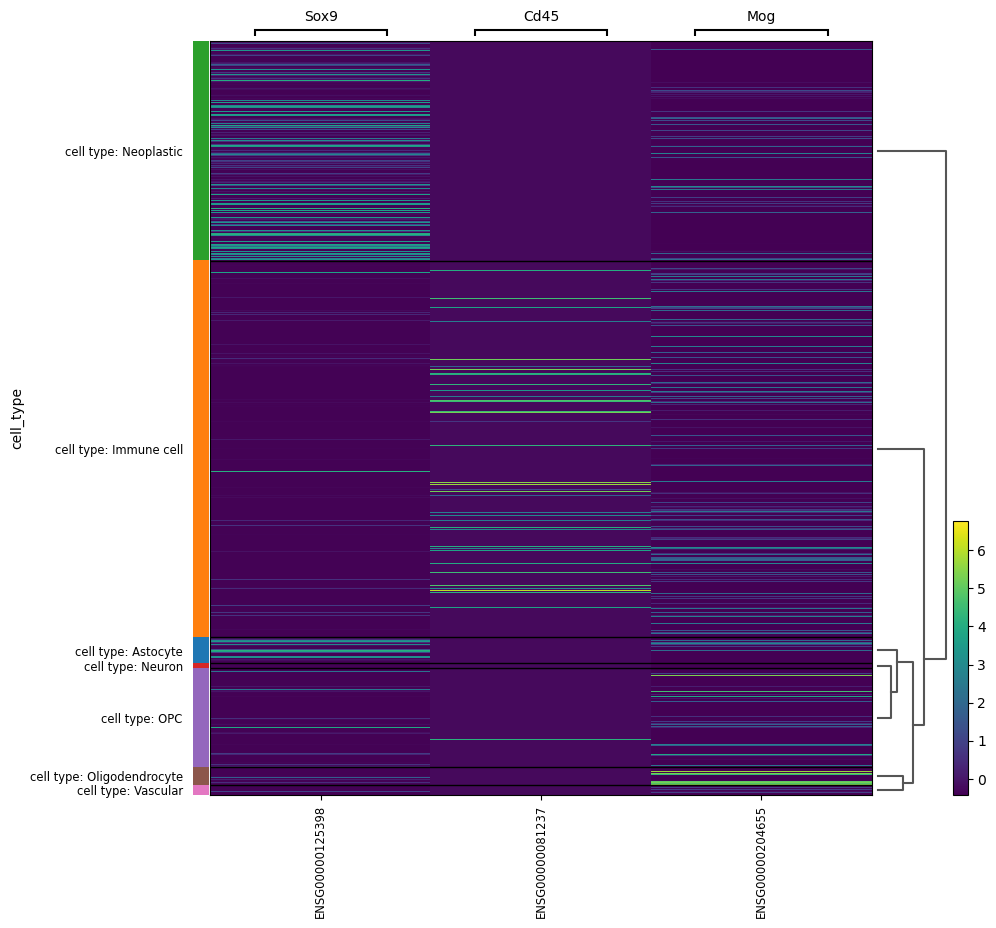

In [25]:
sc.pl.heatmap(adata, markers, groupby='cell_type', dendrogram=True, use_raw=False, figsize=(10,10))

## Task: How does marker gene expression relate to principal components analysis scores across different cell types? 

Another way to examine the relationship of marker genes and cell types is to 
make a PCA plot, like we did previously, but color the scatterplot points 
according to one of the marker gene's expression. 

Perform PCA on the normalized dataset using `sc.tl.pca()`. 

Use `sc.pl.pca_scatter()` to make a scatterplot of the PCA results, coloring cells
by the expression of a marker gene, of your choosing. 

After you have successfully made this plot, repeat this for 
the other genes in your marker list. 
Make more code chunks as you need them.

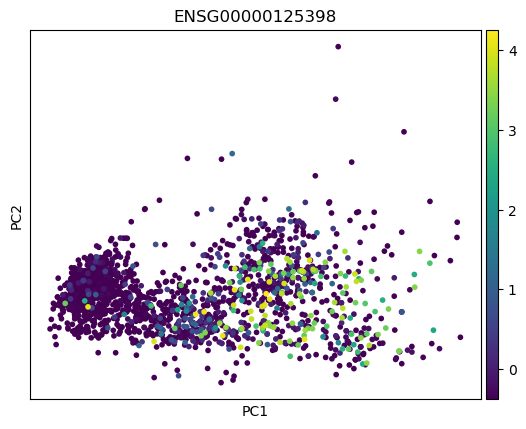

In [27]:
sc.tl.pca(adata)
sc.pl.pca_scatter(adata, color='ENSG00000125398', use_raw=False)

/Users/pranavpabba/opt/anaconda3/envs/sfn-workshop/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/pranavpabba/opt/anaconda3/envs/sfn-workshop/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/pranavpabba/opt/anaconda3/envs/

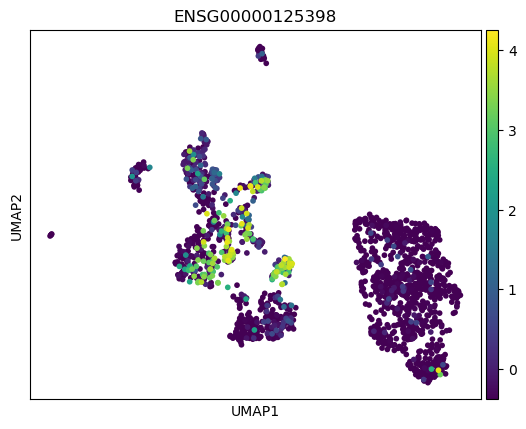

In [29]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color='ENSG00000125398', use_raw=False)